# DEFAULT LIBS

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# SKLEARN

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Code

In [4]:
df = pd.read_csv("additional/ANN/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


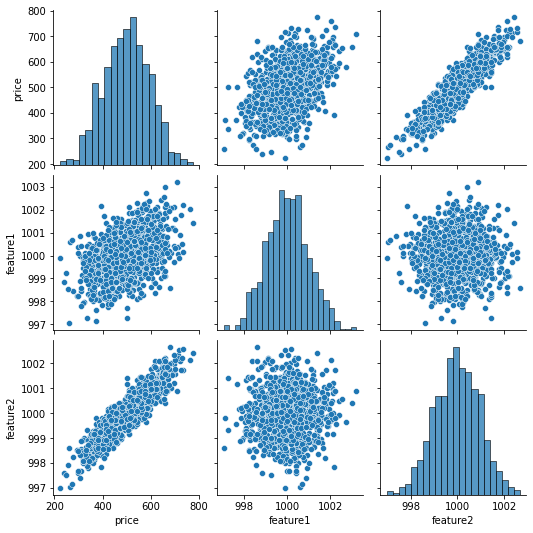

In [6]:
sns.pairplot(df)

In [8]:
X = df[["feature1", "feature2"]].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [18]:
Y = df["price"].values
Y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
scalar = MinMaxScaler().fit(X_train)

In [20]:
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Wrong way of doing models**
```python
model = Sequential([
    Dense(4, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1)
])
```

## Building

In [157]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))

model.add(Dense(1))

## Compiling

In [158]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics="mae"
)

## Fit

In [82]:
X_train.shape

(700, 2)

In [55]:
700/100

7.0

In [159]:
model.fit(X_train, Y_train, batch_size=10, epochs=200, verbose=1) 

Epoch 1/200
70/70 [==============================] - 0s 768us/step - loss: 255817.0938 - mae: 496.8878
Epoch 2/200
70/70 [==============================] - 0s 754us/step - loss: 255444.3594 - mae: 496.5182
Epoch 3/200
70/70 [==============================] - 0s 739us/step - loss: 254850.8281 - mae: 495.9301
Epoch 4/200
70/70 [==============================] - 0s 696us/step - loss: 253938.7500 - mae: 495.0263
Epoch 5/200
70/70 [==============================] - 0s 725us/step - loss: 252613.0469 - mae: 493.7085
Epoch 6/200
70/70 [==============================] - 0s 725us/step - loss: 250787.1094 - mae: 491.8922
Epoch 7/200
70/70 [==============================] - 0s 739us/step - loss: 248386.9062 - mae: 489.4874
Epoch 8/200
70/70 [==============================] - 0s 754us/step - loss: 245349.7812 - mae: 486.4186
Epoch 9/200
70/70 [==============================] - 0s 740us/step - loss: 241609.5156 - mae: 482.6459
Epoch 10/200
70/70 [==============================] - 0s 725us/step - los

In [160]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,mae
0,255817.093750,496.887848
1,255444.359375,496.518158
2,254850.828125,495.930084
3,253938.750000,495.026337
4,252613.046875,493.708527
...,...,...
195,39.953129,5.140206
196,38.362125,5.037561
197,37.078827,4.939575
198,35.611633,4.838784


<AxesSubplot:ylabel='loss'>

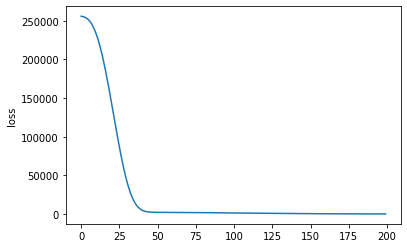

In [161]:
sns.lineplot(y="loss", x=loss_df.index, data=loss_df)

<AxesSubplot:ylabel='mae'>

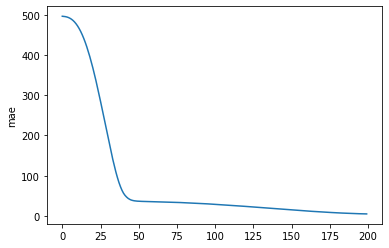

In [162]:
sns.lineplot(y="mae", x=loss_df.index, data=loss_df)

In [88]:
X_test.shape

(300, 2)

In [163]:
model.evaluate(X_test, Y_test, verbose=2, batch_size=10)

30/30 - 0s - loss: 33.8958 - mae: 4.7341 - 92ms/epoch - 3ms/step


[33.895809173583984, 4.7340617179870605]

## Predictions

In [164]:
pred = model(X_test).numpy()
pred

array([[451.74063],
       [487.53268],
       [541.67487],
       [602.7525 ],
       [520.05237],
       [508.1311 ],
       [346.7564 ],
       [616.8512 ],
       [527.9592 ],
       [334.92624],
       [568.6935 ],
       [317.7979 ],
       [493.94424],
       [547.48737],
       [470.70972],
       [517.6559 ],
       [321.8287 ],
       [555.32684],
       [504.30212],
       [363.15356],
       [491.28464],
       [500.9085 ],
       [584.44556],
       [337.17743],
       [457.18118],
       [612.1916 ],
       [419.24963],
       [446.91623],
       [513.3597 ],
       [488.22696],
       [593.82153],
       [572.19666],
       [479.29327],
       [420.49432],
       [468.69244],
       [551.1207 ],
       [487.9826 ],
       [564.7881 ],
       [592.08984],
       [543.3936 ],
       [482.00385],
       [492.95093],
       [624.1059 ],
       [554.9917 ],
       [604.24835],
       [424.81836],
       [550.3513 ],
       [436.17508],
       [453.134  ],
       [414.64774],


In [165]:
Y_true = np.array(Y_test).reshape(-1, 1)

In [166]:
#np.concatenate([Y_true, pred], axis=1)

comparison = pd.DataFrame(np.concatenate([Y_true, pred], axis=1), columns=["True", "Predictions"])
comparison

,True,Predictions
0,453.496812,451.740631
1,485.671404,487.532684
2,531.661939,541.674866
3,608.799181,602.752502
4,515.778446,520.052368
...,...,...
295,623.054496,628.063293
296,418.457178,421.948212
297,534.767374,538.980347
298,469.872387,471.519989


In [167]:
mean_absolute_error(comparison["True"], comparison["Predictions"])

4.734059725705518